In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/FertilizerPrediction.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [ ]:
df["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [ ]:
df["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [ ]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [ ]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

array([[<Axes: title={'center': 'Temparature'}>,
        <Axes: title={'center': 'Humidity '}>],
       [<Axes: title={'center': 'Moisture'}>,
        <Axes: title={'center': 'Nitrogen'}>],
       [<Axes: title={'center': 'Potassium'}>,
        <Axes: title={'center': 'Phosphorous'}>]], dtype=object)

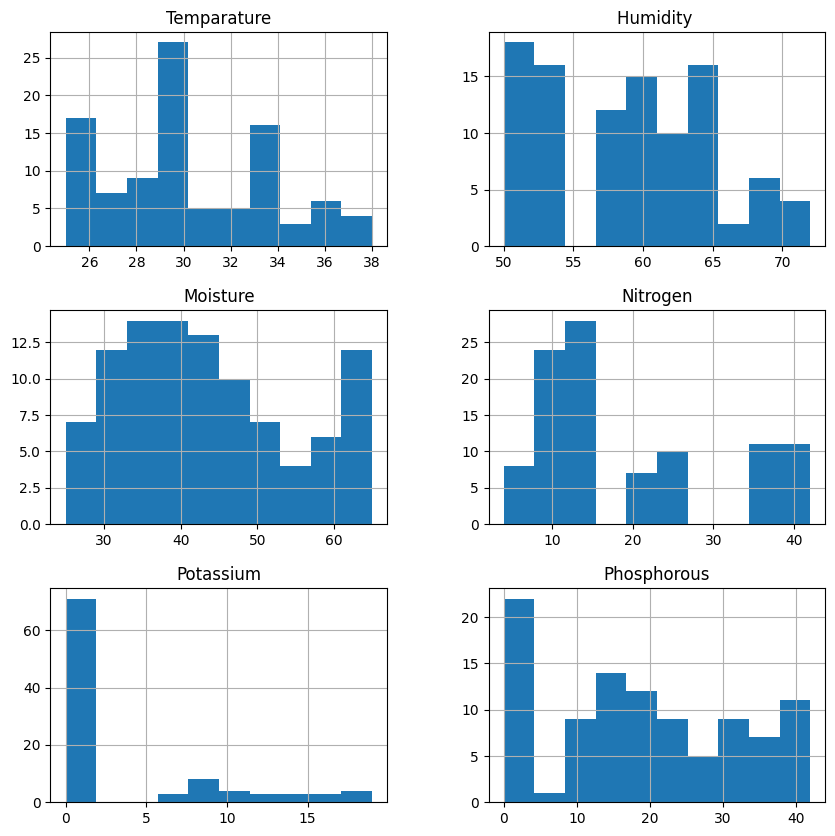

In [ ]:
df.hist(figsize=(10,10))

In [ ]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

In [ ]:
df['Soil Type'].value_counts()

Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64

In [ ]:
df['Crop Type'].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: Crop Type, dtype: int64

In [ ]:
numerical_data_cols = ["Temparature", "Humidity ", "Moisture", "Nitrogen","Potassium", "Phosphorous"]
categorical_data_cols = ["Soil Type", "Crop Type"]

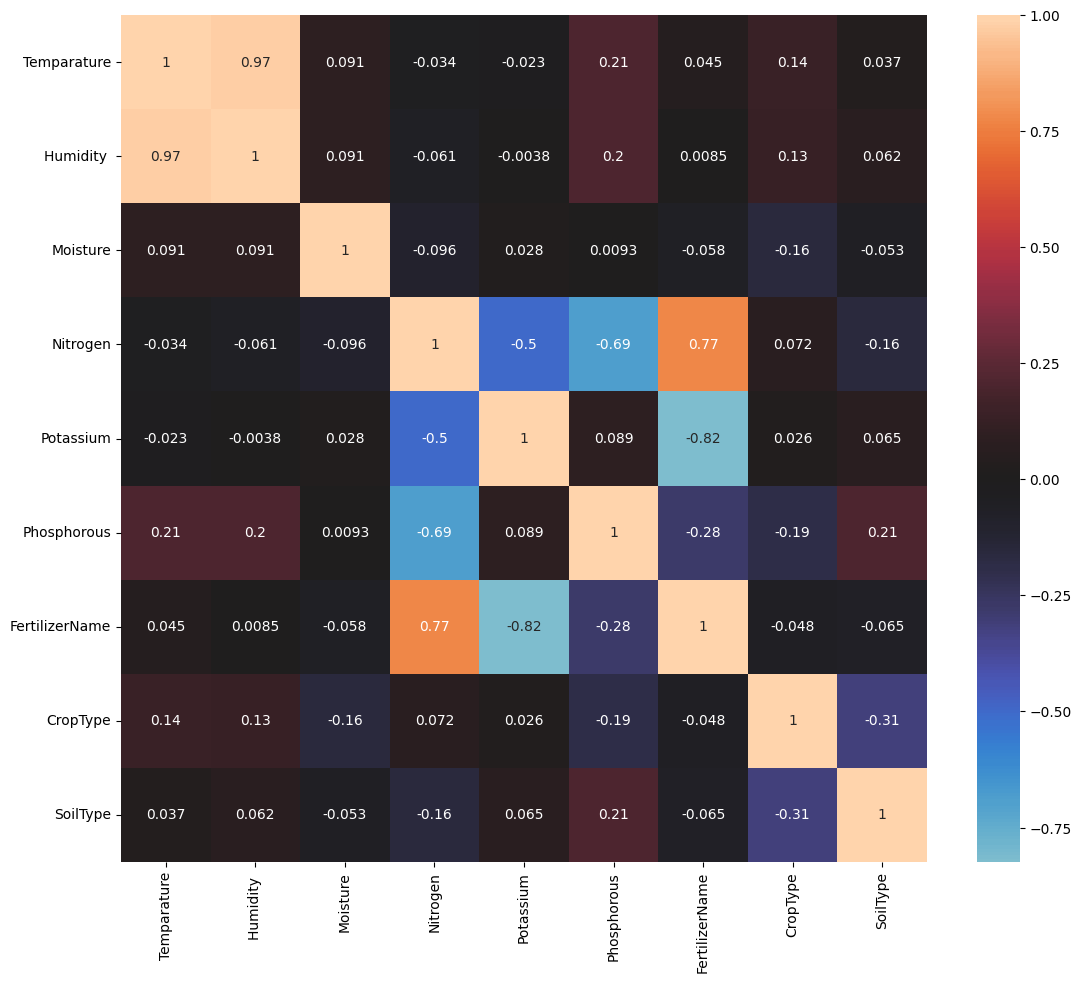

In [ ]:
# @title 熱圖
#sns.heatmap(df[numerical_data_cols].corr(), center = 0, annot = True)
plt.figure(figsize = (13,11))
sns.heatmap(df.corr(), center = 0, annot = True)
plt.show()

In [ ]:
# @title 修改特徵名稱
df['FertilizerName']= df['Fertilizer Name']
df['CropType']= df['Crop Type']
df['SoilType']= df['Soil Type']
df = pd.DataFrame(df,columns=['Temparature','Humidity ','Moisture','Nitrogen','Potassium','Phosphorous','FertilizerName','CropType','SoilType'])
df

KeyError: ignored

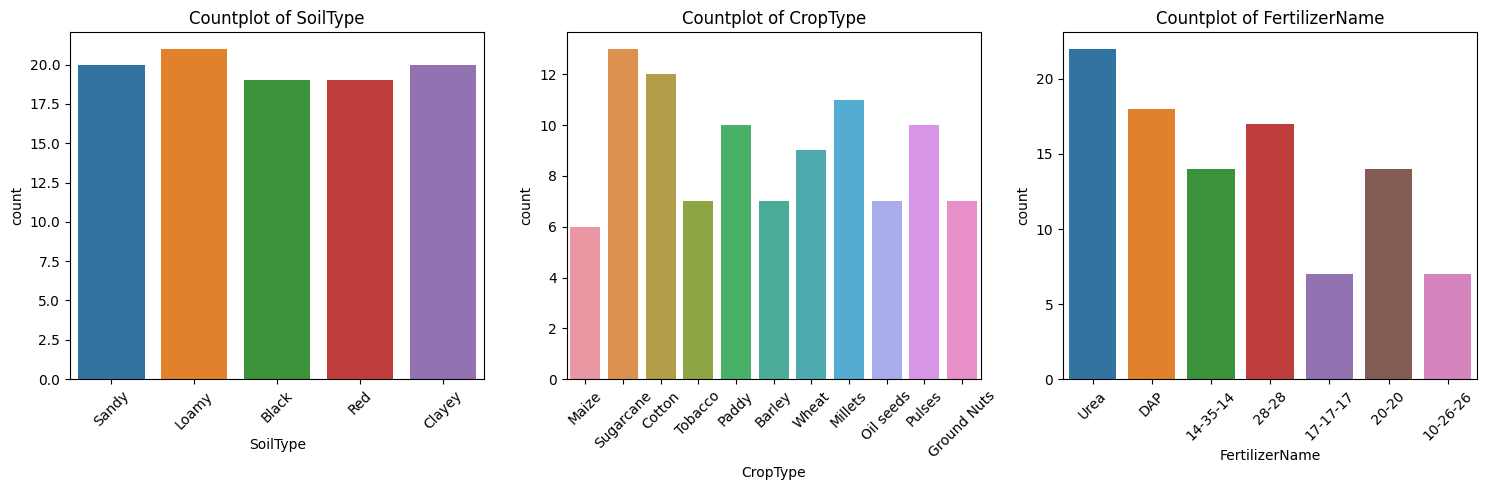

In [ ]:
# @title 類別型資料直方圖
import seaborn as sns
import matplotlib.pyplot as plt

#類別型資料
categorical_columns = ['SoilType', 'CropType', 'FertilizerName']

plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



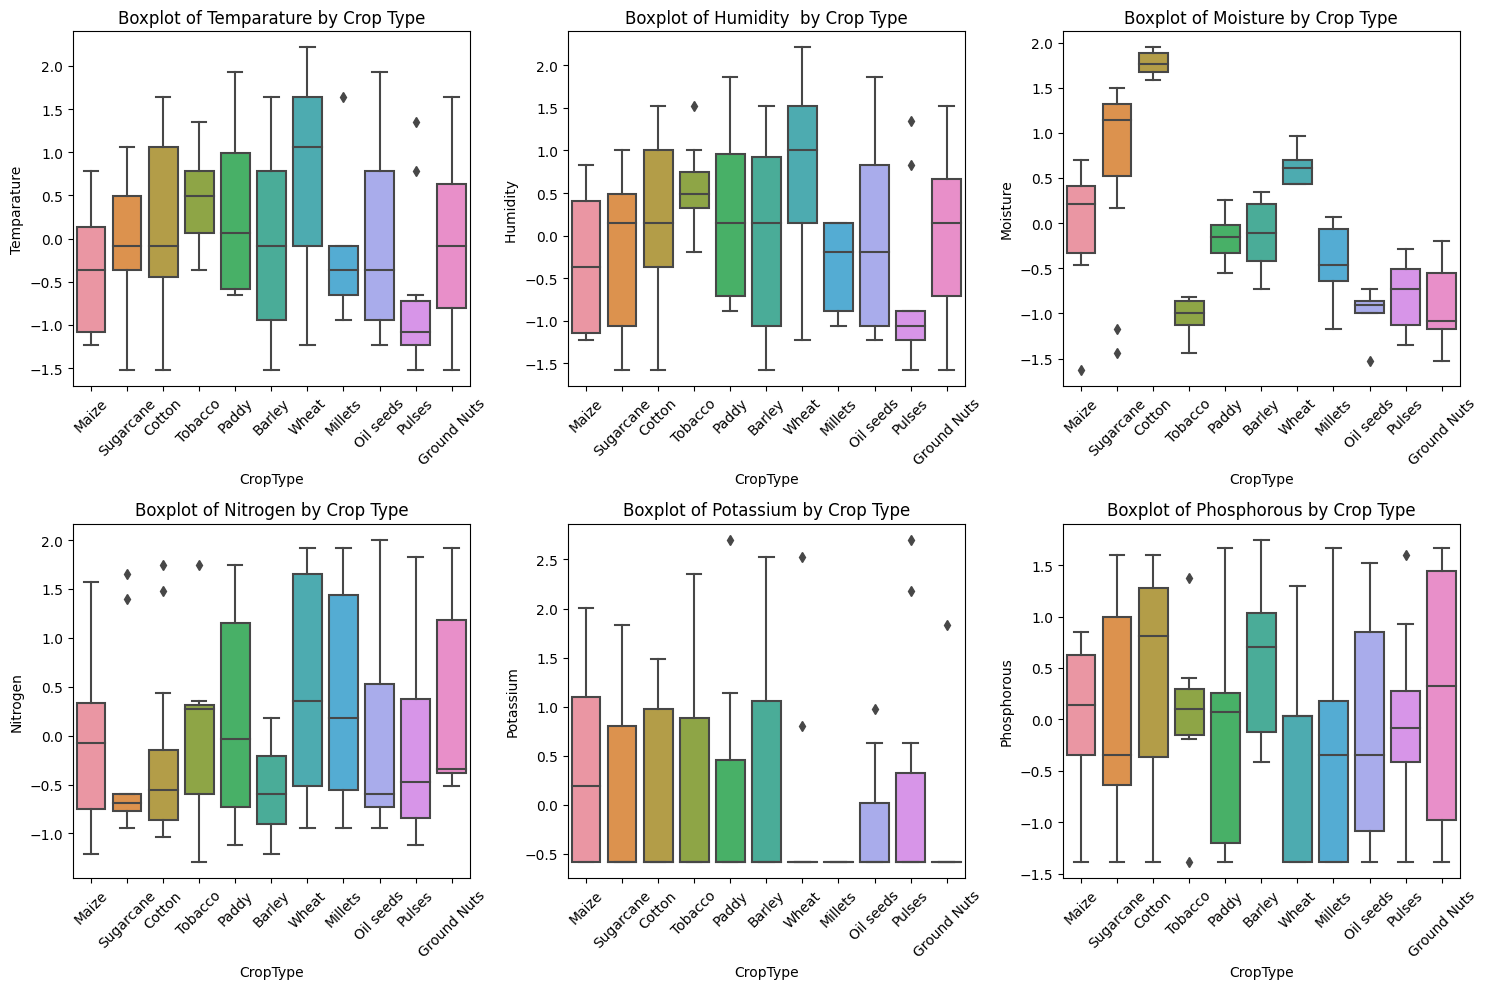

In [ ]:
# @title croptype和連續型資料箱形圖
import seaborn as sns
import matplotlib.pyplot as plt

continuous_columns = ['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='CropType', y=column)
    plt.title(f'Boxplot of {column} by Crop Type')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

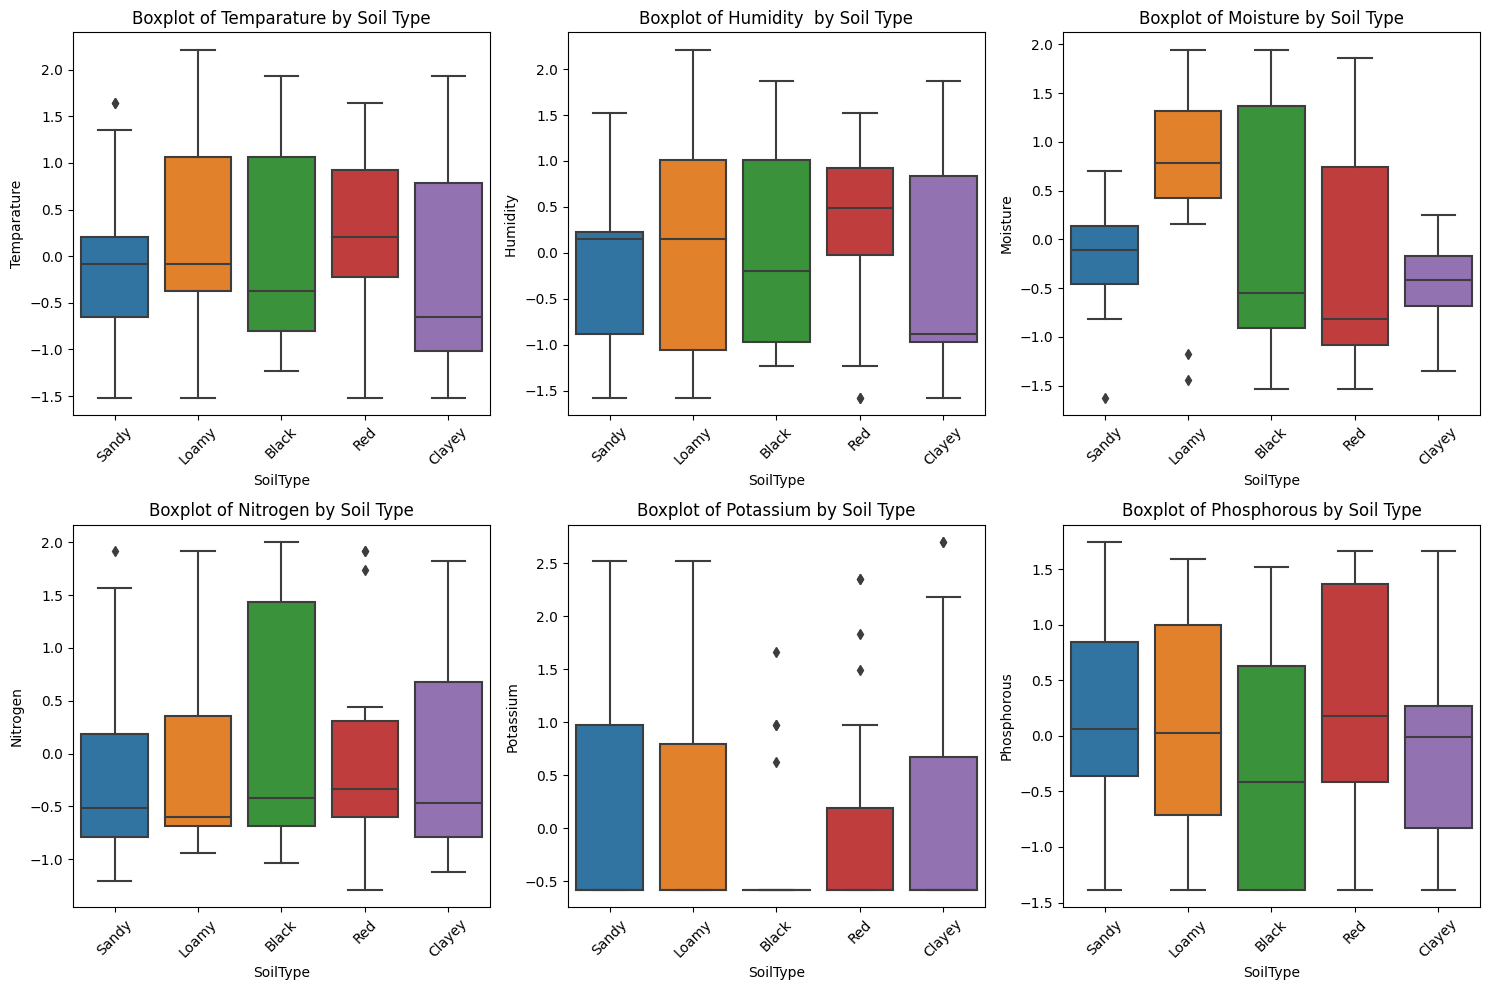

In [ ]:
# @title Soiltype和連續型資料箱形圖
import seaborn as sns
import matplotlib.pyplot as plt

continuous_columns = ['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='SoilType', y=column)
    plt.title(f'Boxplot of {column} by Soil Type')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

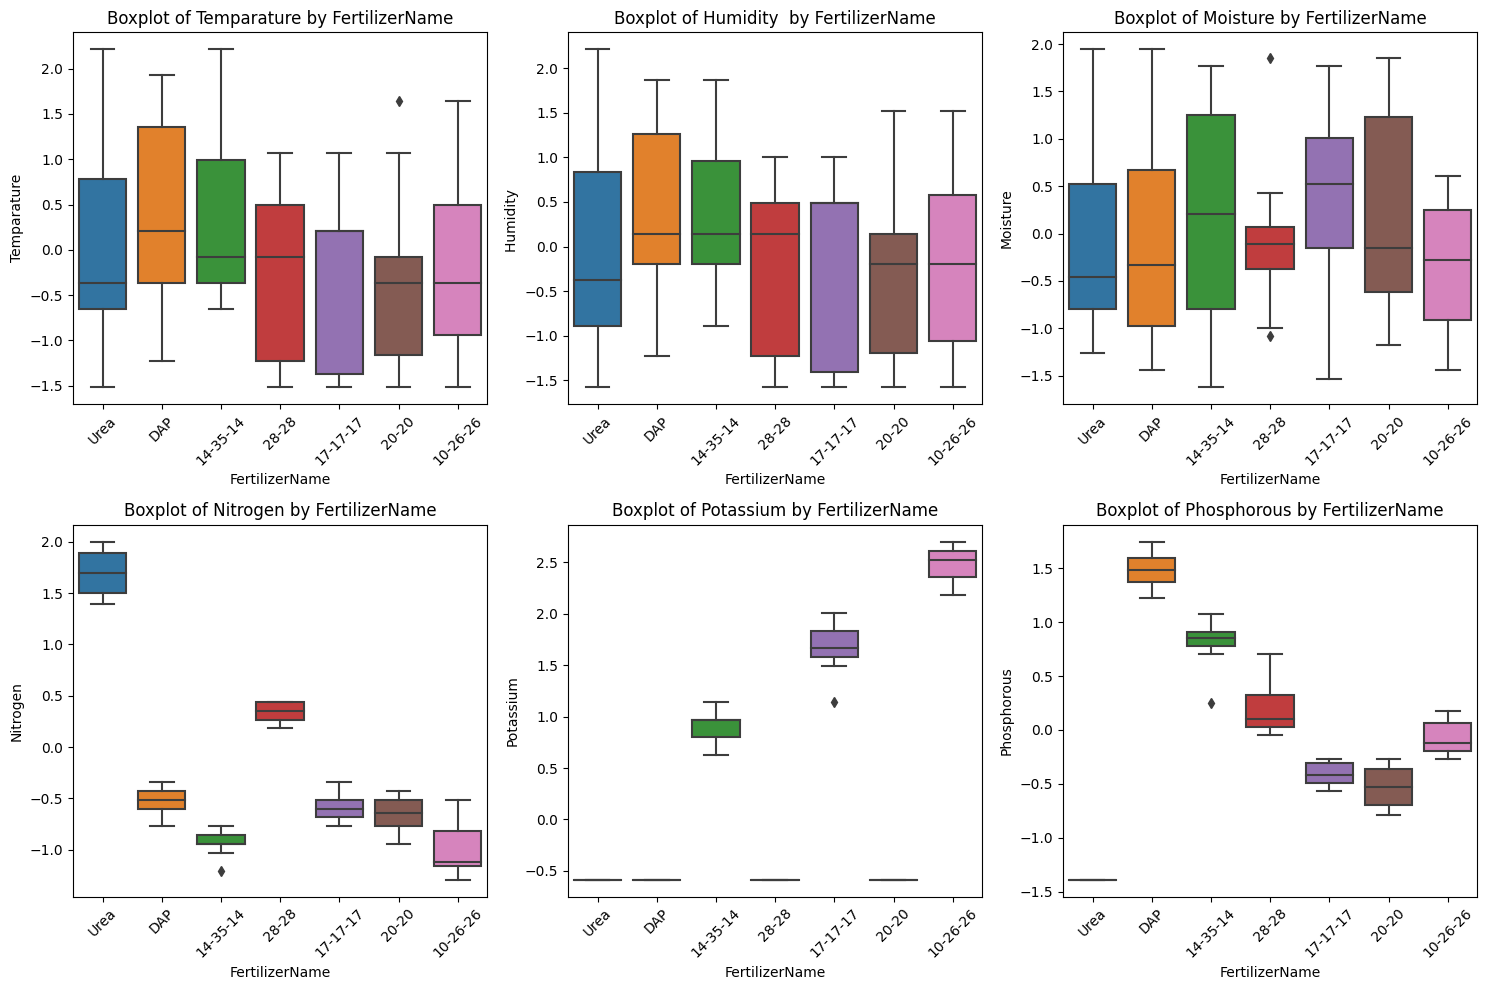

In [ ]:
# @title fertilizername 和連續型資料箱形圖
import seaborn as sns
import matplotlib.pyplot as plt

continuous_columns = ['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='FertilizerName', y=column)
    plt.title(f'Boxplot of {column} by FertilizerName')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#from sklearn.preprocessing import OneHotEncoder

#df = pd.DataFrame({
#    'Crop Type': ['Barley', 'Cotton', 'Ground Nuts', 'Maize','Millets','Oil seeds','Paddy','Pulses','Sugarcane','Tobacco','Wheat']
#    })
#crop_type = df[['Crop Type']]

#encoder = OneHotEncoder(sparse=False)
#encoded_features = encoder.fit_transform(crop_type)

#encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(input_features=['Crop Type']))
#df = pd.concat([df, encoded_df], axis=1)
#df.drop('Crop Type', axis=1, inplace=True)
#print(df)

    Crop Type_Barley  Crop Type_Cotton  Crop Type_Ground Nuts  \
0                1.0               0.0                    0.0   
1                0.0               1.0                    0.0   
2                0.0               0.0                    1.0   
3                0.0               0.0                    0.0   
4                0.0               0.0                    0.0   
5                0.0               0.0                    0.0   
6                0.0               0.0                    0.0   
7                0.0               0.0                    0.0   
8                0.0               0.0                    0.0   
9                0.0               0.0                    0.0   
10               0.0               0.0                    0.0   

    Crop Type_Maize  Crop Type_Millets  Crop Type_Oil seeds  Crop Type_Paddy  \
0               0.0                0.0                  0.0              0.0   
1               0.0                0.0                  0.0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'FertilizerName', 'CropType', 'SoilType'],
      dtype='object')

In [ ]:
# @title 類別型資料轉換
from sklearn.preprocessing import LabelEncoder

encode_crop =  LabelEncoder()
df['CropType'] = encode_crop.fit_transform(df['CropType'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [ ]:
#encoding Soil Type variable
encode_soil = LabelEncoder()
df['SoilType'] = encode_soil.fit_transform(df['SoilType'])

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [ ]:
encode_ferti = LabelEncoder()
df['FertilizerName'] = encode_ferti.fit_transform(df['FertilizerName'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [ ]:
df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,FertilizerName,CropType,SoilType
0,-1.229084,-1.230737,-0.462064,1.567539,-0.584910,-1.387607,6,3,4
1,-0.368145,-1.230737,0.162128,-0.598658,-0.584910,1.297209,5,8,2
2,1.066752,1.006492,1.678023,-1.031898,0.970777,0.849740,1,1,0
3,0.492793,0.490209,-0.818745,0.267821,-0.584910,0.103958,4,9,3
4,-0.655125,-0.886548,0.251298,1.394244,-0.584910,-1.387607,6,6,1


In [ ]:
# @title 連續型特徵標準化

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
continuous_features = df[['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']]
scaled_features = scaler.fit_transform(continuous_features)
df[['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']] = scaled_features

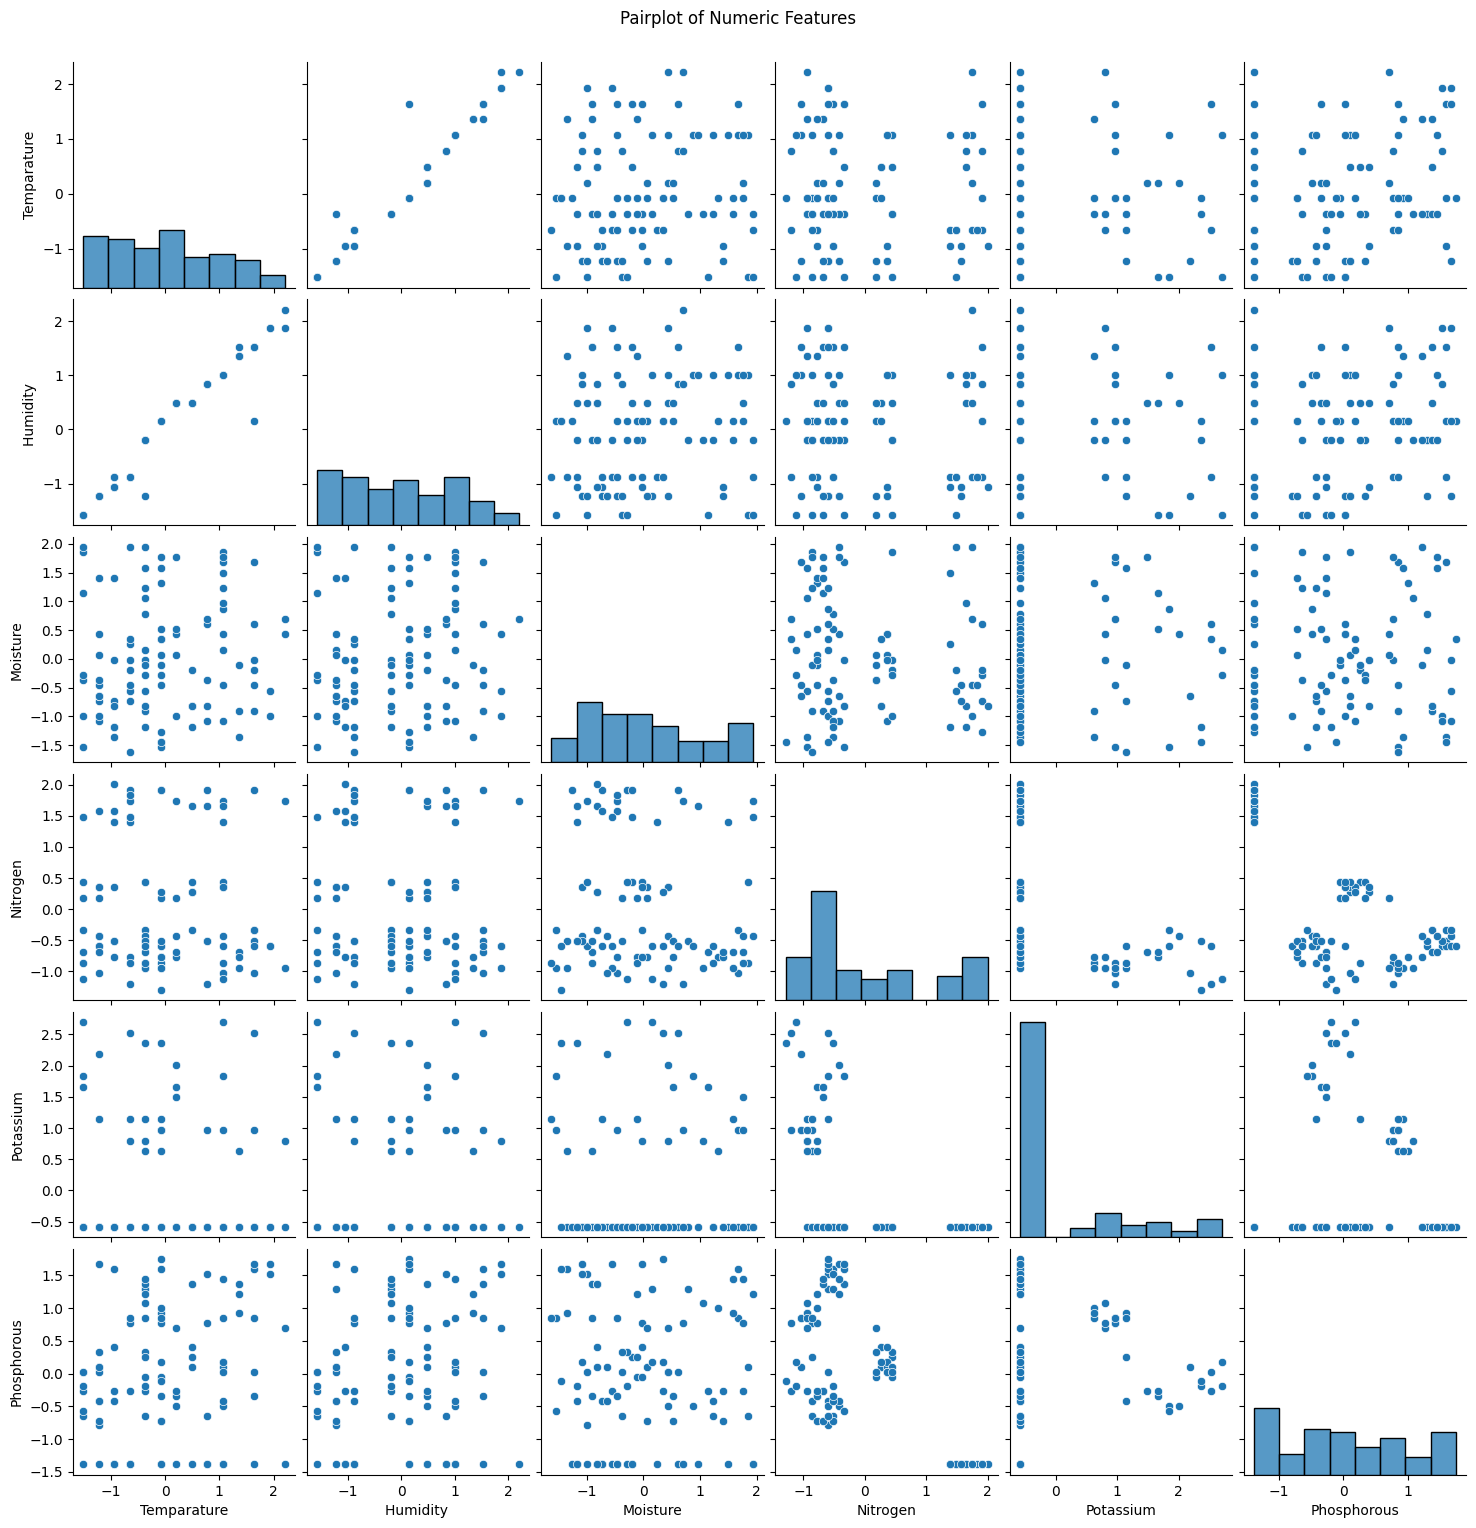

In [ ]:
# 散點圖矩陣
sns.pairplot(df[['Temparature','Humidity ','Moisture','Nitrogen','Potassium','Phosphorous']])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

In [ ]:
df

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,FertilizerName,CropType,SoilType
0,-1.229084,-1.230737,-0.462064,1.567539,-0.584910,-1.387607,6,3,4
1,-0.368145,-1.230737,0.162128,-0.598658,-0.584910,1.297209,5,8,2
2,1.066752,1.006492,1.678023,-1.031898,0.970777,0.849740,1,1,0
3,0.492793,0.490209,-0.818745,0.267821,-0.584910,0.103958,4,9,3
4,-0.655125,-0.886548,0.251298,1.394244,-0.584910,-1.387607,6,6,1
...,...,...,...,...,...,...,...,...,...
94,-1.516063,-1.574926,-0.997086,0.441117,-0.584910,0.029379,4,7,1
95,-0.081166,0.146020,-1.442938,-1.291841,2.353610,-0.119777,0,9,3
96,2.214670,2.211154,0.697150,1.740835,-0.584910,-1.387607,6,10,2
97,1.640711,0.146020,-0.016213,-0.338715,-0.584910,1.670100,5,4,4


In [ ]:
# @title 特徵選擇
from sklearn import feature_selection as fs
from sklearn.feature_selection import chi2

X = df.drop(columns=['FertilizerName'])
y = df['FertilizerName']
skb = fs.SelectKBest(fs.f_classif,k=5)
X_new = skb.fit_transform(X, y)
selected_features = X.columns[skb.get_support()]
print(selected_features)

Index(['Temparature', 'Nitrogen', 'Potassium', 'Phosphorous', 'SoilType'], dtype='object')


In [ ]:
from sklearn import model_selection, tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from subprocess import call
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
!pip install decision-tree-id3

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.2 MB/s eta 0:00:00
  Created wheel for decision-tree-id3: filename=decision_tree_id3-0.1.2-py3-none-any.whl size=15939 sha256=aa7ffeaa25456b84d8a1386fe0c0f7682621602329684c3bd37661dfcfcadcbc
  Stored in directory: /root/.cache/pip/wheels/b5/48/52/e8ac7a547a6343fce8e441f4db4a9052c7a8547fd91f413363
Successfully built decision-tree-id3


In [ ]:
X = df.drop(columns=['FertilizerName'])
y = df['FertilizerName']

In [ ]:
# @title 決策樹
fn=selected_features

x_train,x_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=0)

In [ ]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      0.75      0.86         4
    17-17-17       0.50      1.00      0.67         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         4

    accuracy                           0.95        20
   macro avg       0.93      0.96      0.93        20
weighted avg       0.97      0.95      0.95        20



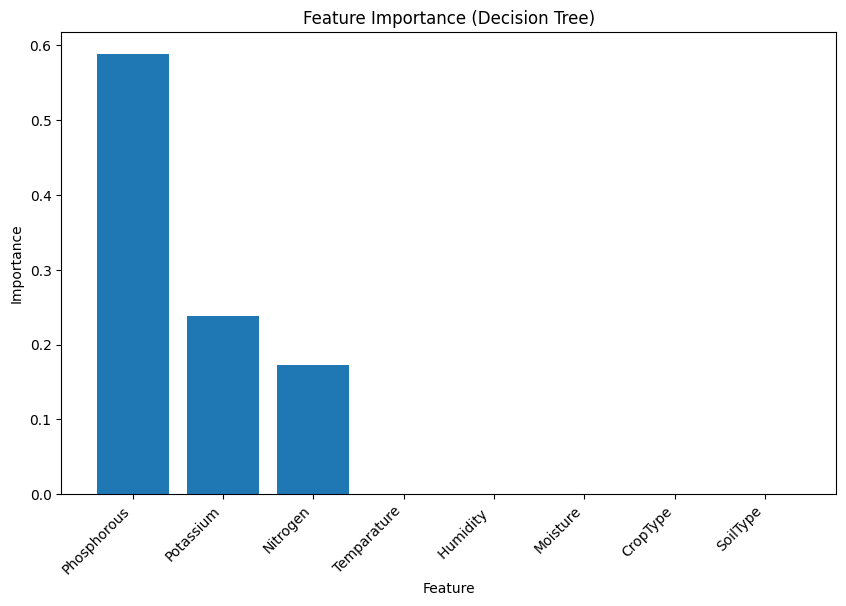

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 假設你的資料是 DataFrame，X 是特徵，y 是目標
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 使用 DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 取得特徵重要性
feature_importance = clf.feature_importances_

# 將特徵名稱和重要性配對
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# 依照重要性排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Decision Tree)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
selected_features

Index(['Temparature', 'Nitrogen', 'Potassium', 'Phosphorous', 'SoilType'], dtype='object')

In [ ]:
# 可视化决策树 X.columns
class_names_str = list(map(str, dtc.classes_))
export_graphviz(dtc, out_file='tree.dot', feature_names=fn, class_names=class_names_str,
                rounded=True, proportion=False, precision=2, filled=True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [ ]:
y

0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: FertilizerName, Length: 99, dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20,max_depth=3)
clf.fit(x_train,y_train)
y_clf_score = clf.predict_proba(x_test)
clf.score(x_test,y_test)

print(metrics.classification_report(y_true=y_test,y_pred=clf.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=clf.predict(x_test))


              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



array([[3, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 4]])

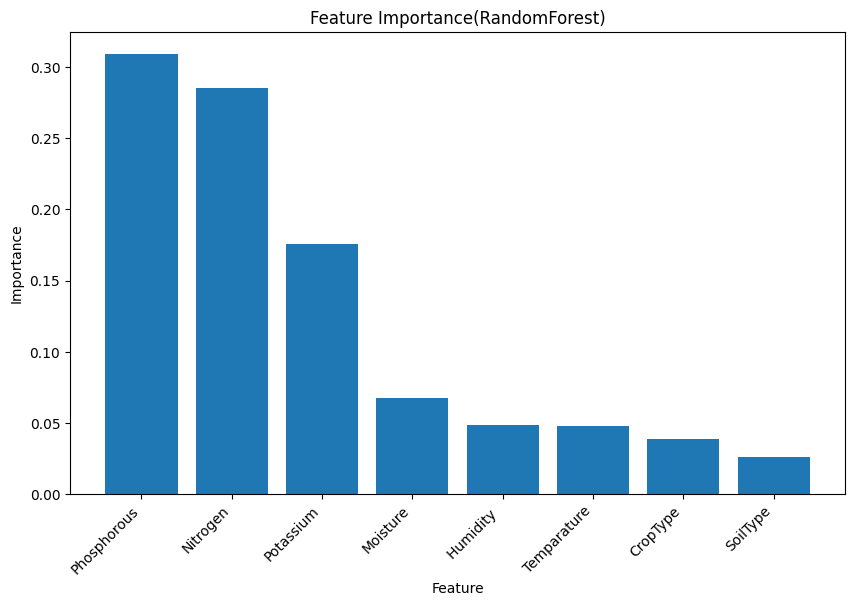

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# 假設你的資料是 DataFrame，X 是特徵，y 是目標
clf = RandomForestClassifier()
clf.fit(X, y)

# 取得特徵重要性
feature_importance = clf.feature_importances_

# 將特徵名稱和重要性配對
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# 依照重要性排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance(RandomForest)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

pred_KN = neigh.predict(x_test)

print(classification_report(y_test,pred_KN))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4

    accuracy                           0.95        20
   macro avg       0.93      0.95      0.92        20
weighted avg       0.97      0.95      0.95        20



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(x_train,y_train)

pred_xgb = xgb.predict(x_test)

print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4

    accuracy                           0.95        20
   macro avg       0.97      0.95      0.96        20
weighted avg       0.96      0.95      0.95        20



In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

